        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [4]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [5]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [7]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


Now, it's time to load the dataset

In [8]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [188]:
X_train.shape

(60000, 784)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

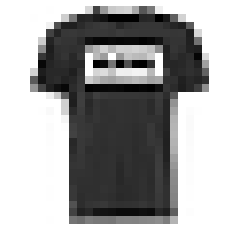

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [71]:
y_train[1]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [12]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


Now, it's your turn,


<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

# TASK 1

# 1. Import statements

<p>The <b>import statement</b> allows us to import one or more modules into your Python program and letting us make use of the definitions constructed in those modules.</p>
The import statement combines two operations; it searches for the named module, then it binds the results of that search to a name in the local scope.

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 2. Data Preprocessing

<p>Data Preprocessing is a technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training the models.<br/>
Data preprocessing is a crucial step that helps enhance the quality of data to promote the extraction of meaningful insights from the data. Data preprocessing in Machine Learning refers to the technique</p>

<p><b>STEP 1:</b> Reshape the data.<br/> Here the shape of the array has been changed from 3-D to 2-D so that it would be easier for the model to process it.<p/>

In [14]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784) 

<p><b>STEP 2:</b> Check if there are any empty values in the training dataset.<br/> Here we see that the answer we got is False that means that there are no missing values in the dataset.<p/>

In [15]:
np.isnan(X_train).any()

False

<p><b>STEP 3:</b> Check if the dataset is evenly distributed across different classes.<br/> Here we see that our dataset is perfectly divided among the 10 classes. So we can use the training set to train our models<p/>

In [16]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

<p><b>STEP 4:</b> Standardize the data.<br/>Here we are going to Standardize our train and test dataset so that our models converge faster<br/>Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1<p/>

In [17]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.fit_transform(X_test.astype(np.float64))

<p><b>STEP 5:</b> Dimension reduction using PCA.<br/> PCA is a dimension reduction technique that allow to summarize information from data into few dimensions.<p/>
<p>First we need to find the number of componentd to reduce the dimension into</p>

In [18]:
pca_investigation = PCA()
pca_investigation = pca_investigation.fit(X_train)

<p>Next we plot a cumulative variance which is the percentage of the total variance that will remain in the dataset 
by keeping N components<br/>
From the plot we can see that with less than 200 components (horizontal axis) the cumulative explained variance is already 
# greater than 95% of the total. SO we choose 120 as the number of components for our PCA model </p>

Text(0, 0.5, 'Fraction of Captured Variance')

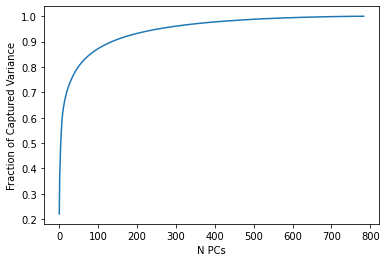

In [19]:
cum_var = np.cumsum(pca_investigation.explained_variance_ratio_)
fig = plt.figure('variance explanation')
ax = fig.add_subplot(111)
ax.plot(cum_var)
ax.set_xlabel('N PCs')
ax.set_ylabel('Fraction of Captured Variance')

<p>Finally we call the PCA method with 120 components to reduce the dimensions of the dataset</p

In [20]:
pca = PCA(n_components=120)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. Custom functions

<p>Custom functions are a piece of code written to carry out a specified task. Some of these tasks are required by the Supervised learning models for easier training and testing of the dataset.</p>

## Batch Trainer function

<p><b>Batch train </b> is a custom function used to split the X-train data into 128 batch sizes and then train the model using only this batch size so that the model training can be done faster and more efficiently.</p>

In [21]:
import warnings
warnings.simplefilter("ignore")

def batch_trainer(model, X_train, Y_train):
    batch_size = 128
    start = 0
    end = len(X_train)
    total_batch = int(end /batch_size)
    for i in range(total_batch):
        if i % 100 == 0:
            print("Training Batch - {} / {}".format(i, total_batch))
        if i == 468:
            model_batch_x_data = X_train[start : start + 96 ]
            model_batch_y_data = y_train[start : start + 96 ]
        else:    
            model_batch_x_data = X_train[start : start + batch_size ]
            model_batch_y_data = y_train[start : start + batch_size ]
        start += batch_size

        model.fit(model_batch_x_data, model_batch_y_data)
    
    return model

## Cross Validation

<p> Cross validation is a statistical method that splits data repeatedly and train multiple methods.<br/>
In the basic approach, called k-fold CV, the training set is split into k smaller sets (here we are usng k=5 folds).<br/>The following procedure is followed for each of the k “folds”:
<ul>
    <li>A model is trained using k-1 of the folds as training data</li>
    <li>he resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).</li>
</ul>

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data, which is a major advantage in problems such as inverse inference where the number of samples is very small.

Here we are using StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.<br/>This function returns the cross validation score and the hyperparameters of the best model</p>


In [22]:
# For finding the best hyperparameter for the given model
def cross_validation(model, param_grid, X_train, Y_train):
    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    grid = GridSearchCV(model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
    batch_trainer(grid, X_train, Y_train)
    
    print("Best Parameter: {}".format(grid.best_params_))
    print("Best Cross Validation Score: {}".format(grid.best_score_))
    return grid

## Accuracy score

<p>Accuracy score function is used to check the accuracy of your prediction model in classification approaches.<br/>Here we are calculating both in-sample and out-sample accuracy score for the model<p>

In [23]:
def acc_score(y_train_hat,y_test_hat,y_train,y_test):  
    print("Accuracy score for the model is as follows:\n")
    in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
    out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
    print("In-sample Accuracy: ", in_sample_acc)
    print("Out-of-sample Accuracy: ", out_of_sample_acc) 

## Confusion matrix

<p>A Confusion matrix is an N x N matrix used for evaluating the performance of a supervised learning model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the supervised learning model.</p> 

In [24]:
def confusion_mat(y_test_hat,y_test):
    print("Confusion Matrix for the model is as follows:")
    cf_matrix = confusion_matrix(y_test,y_test_hat)
    print(cf_matrix)

## Classification report

<p>The classification report visualizer displays the precision, recall, F1, and support scores for the supervised learning model using the confusion matrix</p>

In [25]:
def classification_rep(y_test_hat,y_test):
    print("\nClassification report is as follows:")
    print(classification_report(y_test,y_test_hat))

# 4. Training Supervised learning models

## Using Logistic Regression model

<p>Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. The logistic regression model predicts P(Y=1) as a function of X.</p>
<p>For the Logistic regression model the solver chosen is lbfg, which stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. Also we use penalty= L2 by doing the cross validation on GridsearchCV whic is show in the end</p>

In [72]:
model_lr = LogisticRegression(solver='lbfgs', multi_class  = 'auto', penalty = 'l2')
model_pca_lr = LogisticRegression(solver='lbfgs', multi_class  = 'auto', penalty = 'l2')

<p>Here we are checking if the model performs better if PCA is done on the data or when the data is just standerdized.
Hence we are creating two models. One using just the standardized data and the other using the PCA scaled data</p>

In [73]:
# Training the model in different batch sizes using the batch train function for standerdized data
model_lr = batch_trainer(model_lr, X_train, y_test)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468


In [28]:
# Training the model in different batch sizes using the batch train function for PCA data
model_pca_lr = batch_trainer(model_pca_lr, X_train_pca, y_test)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468


<p>Predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> standardized dataset</b></p> 

In [75]:
y_test_hat = model_lr.predict(X_test)
y_train_hat = model_lr.predict(X_train)
acc_score(y_train_hat,y_test_hat,y_train,y_test)

Accuracy score for the model is as follows:

In-sample Accuracy:  69.68666666666667
Out-of-sample Accuracy:  68.8


In [76]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[733   3  35 145  18   5  26   6  29   0]
 [  4 884  15  79  16   0   0   1   1   0]
 [ 37   0 665  39 151  12  80   1  13   2]
 [ 25  33  63 760 108   0   7   0   4   0]
 [  3   5 204  26 654   7  93   0   5   3]
 [  0   0   0   5   3 410   0 529   5  48]
 [187   4 192 127 283  40 128   4  31   4]
 [  0   0   0   0   0   4   0 951   0  45]
 [  2   0  20  40   5  11  22  66 819  15]
 [  0   1   4   5   2  20   0  90   2 876]]


In [77]:
classification_rep(y_test_hat,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1000
           1       0.95      0.88      0.92      1000
           2       0.56      0.67      0.61      1000
           3       0.62      0.76      0.68      1000
           4       0.53      0.65      0.58      1000
           5       0.81      0.41      0.54      1000
           6       0.36      0.13      0.19      1000
           7       0.58      0.95      0.72      1000
           8       0.90      0.82      0.86      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.67     10000
weighted avg       0.69      0.69      0.67     10000



In [32]:
param_grid = {'penalty' : ['l2', 'none']}
grid_lr = cross_validation(model_lr, param_grid, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'penalty': 'l2'}
Best Cross Validation Score: 0.7265625


<p>Predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> PCA dimension reduced dataset</b></p>

In [33]:
y_test_hat_pca = model_pca_lr.predict(X_test_pca)
y_train_hat_pca = model_pca_lr.predict(X_train_pca)
acc_score(y_train_hat_pca,y_test_hat_pca,y_train,y_test)

Accuracy score for the model is as follows:

In-sample Accuracy:  69.35333333333334
Out-of-sample Accuracy:  68.27


In [34]:
confusion_mat(y_test_hat_pca,y_test)

Confusion Matrix for the model is as follows:
[[741   3  33 141  23   5  20   4  29   1]
 [  3 880   9  87  18   0   1   1   1   0]
 [ 47   1 614  42 171   8 102   2   7   6]
 [ 24  39  74 743 111   0   6   0   3   0]
 [  3   5 176  30 678   4  98   1   2   3]
 [  1   0   2   7   1 437   1 490   6  55]
 [191   5 174 124 295  40 137   2  25   7]
 [  0   0   0   0   0  10   0 944   0  46]
 [  3   0  27  40   8  12  26  58 780  46]
 [  0   1   2   2   2  17   3  98   2 873]]


In [35]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.94      0.88      0.91      1000
           2       0.55      0.61      0.58      1000
           3       0.61      0.74      0.67      1000
           4       0.52      0.68      0.59      1000
           5       0.82      0.44      0.57      1000
           6       0.35      0.14      0.20      1000
           7       0.59      0.94      0.73      1000
           8       0.91      0.78      0.84      1000
           9       0.84      0.87      0.86      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



In [36]:
param_grid = {'penalty' : ['l2', 'none']}
grid_pca_lr = cross_validation(model_pca_lr, param_grid, X_train_pca, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'penalty': 'l2'}
Best Cross Validation Score: 0.734375


<p> Here we cannot find threshold that is used to make a classification decision. As we have to plot the precison-recall curve to find out this threshold value, here since we are using multiclass distribution it is not possible to plot the curve.</p>

<h6> As we can see from the accuracy score , precision and recall that using PCA does have any advantage on the performance of the model. Hence the model trained using just the standardized data performs much better than the one with PCA.<h6>

## Using Naive bayers model

<p>Naive Bayers is a classification technique based on Bayes’ theorem with an assumption of independence between predictors.</p> Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Hence we use Gaussian NB here for our classification model and we choose var_smootthing parameter by doing gridsearchCV on the data</p>
<p><p>Here we are checking if the model performs better if PCA is done on the data or when the data is just standerdized.
Hence we are creating two models. One using just the standardized data and the other using the PCA scaled data</p>

In [37]:
# training the gaussian model using standerdized data
model_nb = GaussianNB(var_smoothing =  0.02848035868435802)
model_nb = batch_trainer(model_nb, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468


In [38]:
# Training the model in different batch sizes using the batch train function for PCA data
model_pca_nb = GaussianNB(var_smoothing = 0.0005336699231206307)
model_pca_nb = batch_trainer(model_pca_nb, X_train_pca, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468


<p>Predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> standardized dataset</b></p>

In [39]:
y_test_hat = model_nb.predict(X_test)
y_train_hat = model_nb.predict(X_train)
acc_score(y_train_hat,y_test_hat,y_train,y_test) 

Accuracy score for the model is as follows:

In-sample Accuracy:  60.65166666666667
Out-of-sample Accuracy:  60.42999999999999


In [40]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[675   5  58 133  50   8   5   8  57   1]
 [ 10 714  18 250   6   0   0   0   2   0]
 [ 53   1 397  94 201  20 201   1  32   0]
 [ 30  10  18 834  91   1   8   1   7   0]
 [  5   0 171 110 373   8 318   3  10   2]
 [  0   0   0   2   0 339   0 618   5  36]
 [191   9 152 166 208  39 147   5  82   1]
 [  0   0   0   0   0   2   0 971   0  27]
 [  1   0  19  92   8  10   2  38 814  16]
 [  0   0   3   2   0  58   0 156   2 779]]


In [41]:
classification_rep(y_test_hat,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.97      0.71      0.82      1000
           2       0.47      0.40      0.43      1000
           3       0.50      0.83      0.62      1000
           4       0.40      0.37      0.39      1000
           5       0.70      0.34      0.46      1000
           6       0.22      0.15      0.17      1000
           7       0.54      0.97      0.69      1000
           8       0.81      0.81      0.81      1000
           9       0.90      0.78      0.84      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.59     10000
weighted avg       0.62      0.60      0.59     10000



In [42]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_nb = cross_validation(model_nb, param_grid, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'var_smoothing': 0.02848035868435802}
Best Cross Validation Score: 0.7109375


<p>Predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> PCA dimension reduced dataset</b></p>

In [43]:
y_test_hat_pca = model_pca_nb.predict(X_test_pca)
y_train_hat_pca = model_pca_nb.predict(X_train_pca)
acc_score(y_train_hat_pca,y_test_hat_pca,y_train,y_test) 

Accuracy score for the model is as follows:

In-sample Accuracy:  57.120000000000005
Out-of-sample Accuracy:  56.44


In [44]:
confusion_mat(y_test_hat_pca,y_test)

Confusion Matrix for the model is as follows:
[[433   6 204 120  45   4   0   7 179   2]
 [  0 776  23 156  19   1   0   0  25   0]
 [ 10   1 605  93 156   4  41   0  90   0]
 [  7  46 133 685  78   5   0   0  46   0]
 [  1   2 400  31 489   1  40   0  35   1]
 [  0   1  35  41   2 305   0 469  88  59]
 [ 71   5 250 182 262   6  74   6 143   1]
 [  0   0  10   5   1  13   0 900   5  66]
 [  0   0 192  38  24  22   0  13 682  29]
 [  0   0   9   0   1  10   0 192  93 695]]


In [45]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.83      0.43      0.57      1000
           1       0.93      0.78      0.84      1000
           2       0.33      0.60      0.42      1000
           3       0.51      0.69      0.58      1000
           4       0.45      0.49      0.47      1000
           5       0.82      0.30      0.44      1000
           6       0.48      0.07      0.13      1000
           7       0.57      0.90      0.70      1000
           8       0.49      0.68      0.57      1000
           9       0.81      0.69      0.75      1000

    accuracy                           0.56     10000
   macro avg       0.62      0.56      0.55     10000
weighted avg       0.62      0.56      0.55     10000



In [46]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_pca_nb = cross_validation(model_pca_nb, param_grid, X_train_pca, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'var_smoothing': 0.0006579332246575676}
Best Cross Validation Score: 0.6484375


<h6> As we can see from the accuracy score , precision and recall that using PCA does have any advantage on the performance of the model. Hence the model trained using just the standardized data performs much better than the one with PCA.<h6>

##### From now on we will not be using PCA to train the model as it is not helpful while the model is learning

## Using K-nearest neighbours model

<p>KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function).
Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors</p>
<p>Here first we need to find out the number of neighbours to be chosen for the classification model. Hence we find the best possible model by training all the models with neighbours from 5-8 and choosing the best one based on accuracy score.</p>

In [43]:
KNN_model_knc = KNeighborsClassifier()

param_grid = {'n_neighbors': [5,6,7,8]}
grid_knc = cross_validation(KNN_model_knc, param_grid, X_train, y_train)


Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'n_neighbors': 5}
Best Cross Validation Score: 0.6633846153846155


<p>Now we train the model according the parameter obtained in the previous step.<br/> And predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> standardized dataset</b></p>

In [44]:
bestModel = grid_knc.best_estimator_
y_train_hat = bestModel.predict(X_train)
y_test_hat = bestModel.predict(X_test)
acc_score(y_train_hat,y_test_hat,y_train,y_test) 

Accuracy score for the model is as follows:

In-sample Accuracy:  61.76833333333334
Out-of-sample Accuracy:  61.739999999999995


In [45]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[798   4  27 133  23   0   5   5   4   1]
 [ 23 901  11  52  12   0   0   1   0   0]
 [140   2 540  30 198   0  86   3   1   0]
 [ 53 170  23 690  57   0   7   0   0   0]
 [ 44   9 220  91 549   0  80   1   6   0]
 [  9   0   0  38   0 303   0 612   0  38]
 [305   4 247 140 194   0  97  10   3   0]
 [  0   0   0   0   0   0   0 985   0  15]
 [  9   0  56  77  28   2  26 189 599  14]
 [  4   0   4  12   4  16   1 245   2 712]]


In [46]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.87      0.31      0.46      1000
           1       0.89      0.80      0.84      1000
           2       0.29      0.67      0.40      1000
           3       0.51      0.57      0.54      1000
           4       0.43      0.33      0.37      1000
           5       0.78      0.36      0.49      1000
           6       0.51      0.06      0.11      1000
           7       0.61      0.83      0.70      1000
           8       0.45      0.73      0.56      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.54     10000
   macro avg       0.61      0.54      0.52     10000
weighted avg       0.61      0.54      0.52     10000



<p> While fininding the best hyperparmeter for the model we have also done the cross validation and have found the value for the best model.</p> 

## Using SVM model

<p>SVM or Support Vector Machine is a linear model for classification and regression problems.<br/> The idea of SVM is: The algorithm creates a line or a hyperplane which separates the data into classes</p>
<p>While we can consider each pixel as a feature, it is much more managable if we first reduce the dimension. Hence we are doing dimension reduction here.</p>

In [47]:
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=20, 
          whiten=True, random_state=0)
# Initialize SVC model
svc = SVC(kernel='rbf',  class_weight='balanced')
# Create pipleline model
model_svc = make_pipeline(pca, svc)

<p>Here we need to first check the best hyperparameters to train the model. Using cross validation with gridCV we can find the best hyperparameter </p>

In [48]:
param_grid = {'svc__C': [.1, 1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid_svc = cross_validation(model_svc, param_grid, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'svc__C': 5, 'svc__gamma': 0.005}
Best Cross Validation Score: 0.7649230769230769


<p>Now we train the model according the parameter obtained in the previous step.<br/> And predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> PCA dataset</b></p>

In [49]:
bestModel = grid_svc.best_estimator_
y_train_hat  = bestModel.predict(X_train)
y_test_hat = bestModel.predict(X_test)
acc_score(y_train_hat,y_test_hat,y_train,y_test)

Accuracy score for the model is as follows:

In-sample Accuracy:  66.03833333333333
Out-of-sample Accuracy:  65.48


In [50]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[742   1   9 209  16   2   4   1  16   0]
 [  8 797   1 172  21   0   0   1   0   0]
 [ 57   3 434  61 303  13 116   1  11   1]
 [ 26  14  19 822 107   0  10   0   2   0]
 [  4   4 118  48 632  13 172   0   8   1]
 [  0   0   0  61   2 411   1 485   0  40]
 [187   4 108 213 257  43 146   4  38   0]
 [  0   0   0   1   0  11   0 966   0  22]
 [  4   1  14  70  20  14   2  61 803  11]
 [  0   3   3  11   4  21   0 162   1 795]]


In [51]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.87      0.31      0.46      1000
           1       0.89      0.80      0.84      1000
           2       0.29      0.67      0.40      1000
           3       0.51      0.57      0.54      1000
           4       0.43      0.33      0.37      1000
           5       0.78      0.36      0.49      1000
           6       0.51      0.06      0.11      1000
           7       0.61      0.83      0.70      1000
           8       0.45      0.73      0.56      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.54     10000
   macro avg       0.61      0.54      0.52     10000
weighted avg       0.61      0.54      0.52     10000



<p> While finding the best hyperparmeter for the model we have also done the cross validation and have found the value for the best model.</p>

## Using Decision Tree model

<p>Decision Trees are a non-parametric supervised learning method used for classification <br/>A tree can be "learned" by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node has all the same value of the target variable, or when splitting no longer adds value to the predictions. This process of top-down induction of decision trees is an example of a greedy algorithm, and it is the most common strategy for learning decision trees</p>
<p>First we need to find the best hyperparameters for the decision tree classifier</p>

In [52]:
model_dt = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [5,6,7,8]}

grid_dt = cross_validation(model_dt, param_grid, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'criterion': 'entropy', 'max_depth': 6}
Best Cross Validation Score: 0.5932307692307692


<p>Now we train the model according the parameter obtained in the previous step.<br/> And predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> Standardized dataset</b></p>

In [53]:
bestModel = grid_dt.best_estimator_
y_train_hat  = bestModel.predict(X_train)
y_test_hat  = bestModel.predict(X_test)
acc_score(y_train_hat,y_test_hat,y_train,y_test)

Accuracy score for the model is as follows:

In-sample Accuracy:  55.505
Out-of-sample Accuracy:  54.81


In [54]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[524  23 115 195  44  18  15  10  56   0]
 [  1 776  26 163  12  12   2   2   6   0]
 [ 75  41 538  21 113  18 125   0  69   0]
 [  6   7 138 691  67  42  31  11   7   0]
 [ 11  12 358  36 308  11 221   0  43   0]
 [  2   4   7   1   2 503   1 293  40 147]
 [104  27 355 118 173  22 105   2  94   0]
 [  0   0   0   1   0  59   0 704  17 219]
 [  1  46 162 182  13  28   5  55 503   5]
 [  1   0  11   0   2  50   8  69  30 829]]


In [55]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.87      0.31      0.46      1000
           1       0.89      0.80      0.84      1000
           2       0.29      0.67      0.40      1000
           3       0.51      0.57      0.54      1000
           4       0.43      0.33      0.37      1000
           5       0.78      0.36      0.49      1000
           6       0.51      0.06      0.11      1000
           7       0.61      0.83      0.70      1000
           8       0.45      0.73      0.56      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.54     10000
   macro avg       0.61      0.54      0.52     10000
weighted avg       0.61      0.54      0.52     10000



<p> While finding the best hyperparmeter for the model we have also done the cross validation and have found the value for the best model.</p>

[Text(145.56521739130434, 201.90857142857143, 'X[67] <= -0.934\nentropy = 3.274\nsamples = 128\nvalue = [10, 15, 14, 12, 10, 13, 7, 20, 13, 14]'),
 Text(65.50434782608696, 170.84571428571428, 'X[523] <= -0.373\nentropy = 2.037\nsamples = 57\nvalue = [0, 0, 0, 1, 0, 13, 0, 20, 9, 14]'),
 Text(29.11304347826087, 139.78285714285715, 'X[422] <= -0.328\nentropy = 0.995\nsamples = 24\nvalue = [0, 0, 0, 0, 0, 13, 0, 11, 0, 0]'),
 Text(14.556521739130435, 108.72, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 13, 0, 0, 0, 0]'),
 Text(43.66956521739131, 108.72, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 0, 0, 11, 0, 0]'),
 Text(101.89565217391305, 139.78285714285715, 'X[288] <= -0.931\nentropy = 1.7\nsamples = 33\nvalue = [0, 0, 0, 1, 0, 0, 0, 9, 9, 14]'),
 Text(72.78260869565217, 108.72, 'X[220] <= -0.161\nentropy = 1.175\nsamples = 24\nvalue = [0, 0, 0, 0, 0, 0, 0, 9, 1, 14]'),
 Text(58.22608695652174, 77.65714285714284, 'X[332] <= 1.435\nentropy = 1.041\nsamples = 12\nvalue

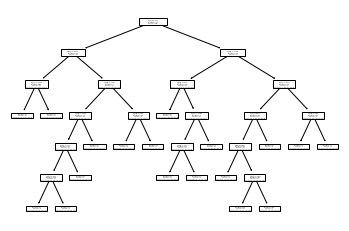

In [56]:
from sklearn import tree
tree.plot_tree(bestModel)

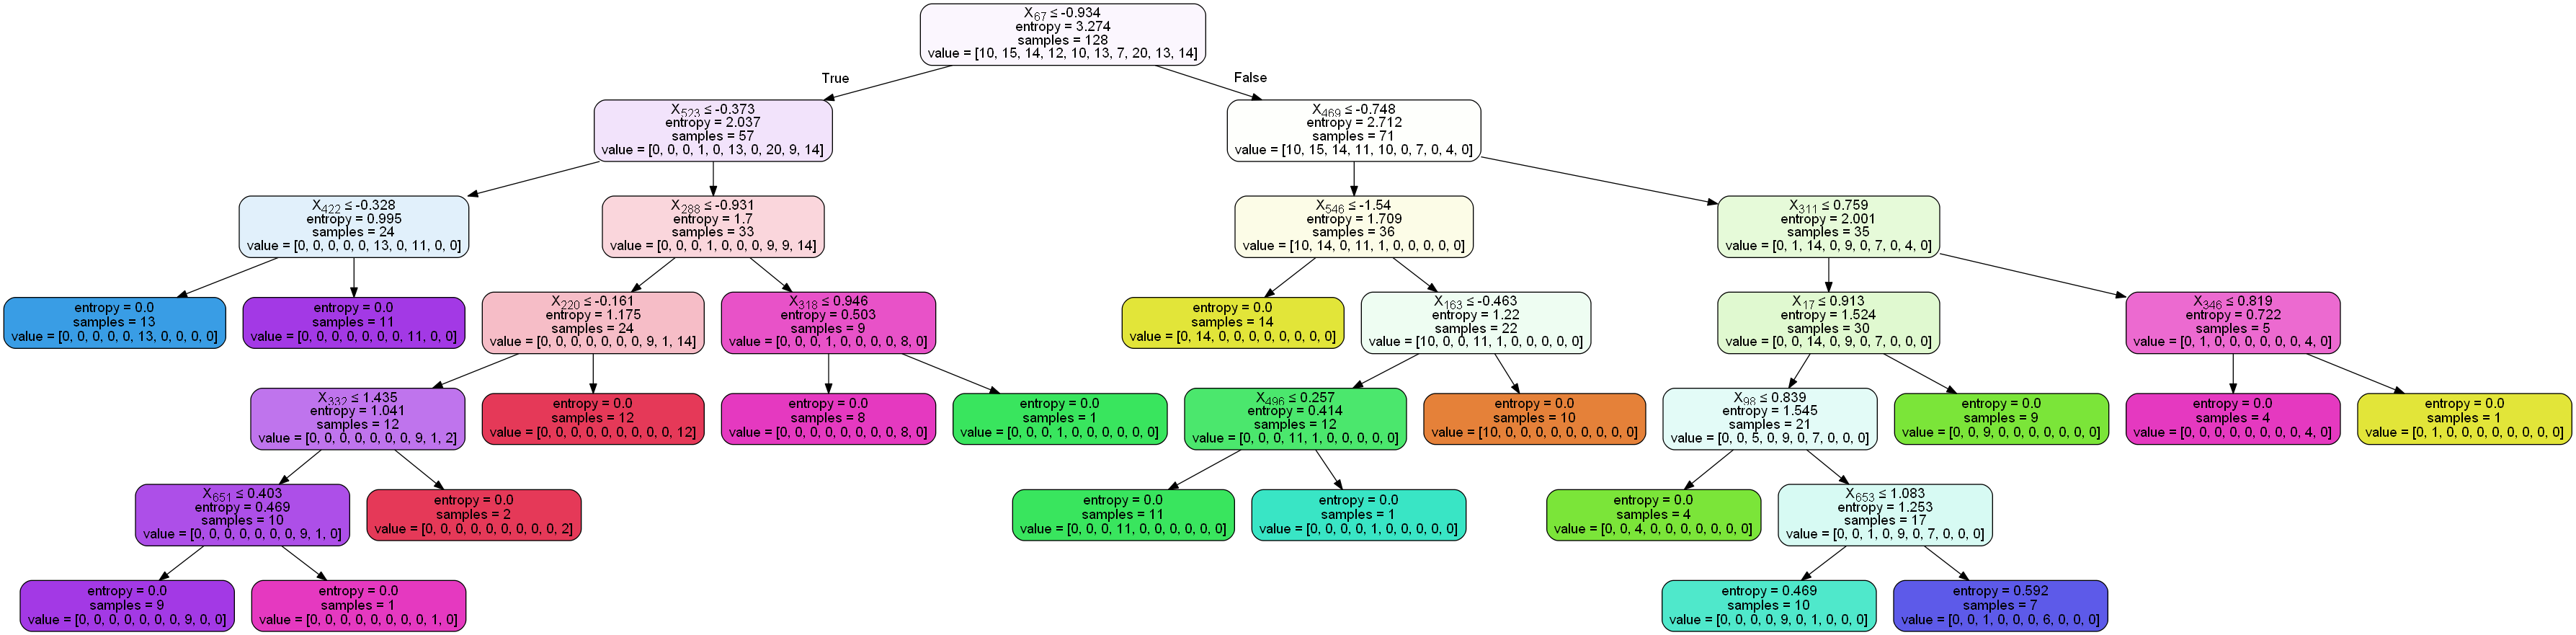

In [57]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(bestModel , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT.png')
Image(graph.create_png())

## Using Random forest model

<p>A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting</p>

In [50]:
model_rf = RandomForestClassifier()
param_grid = {'n_estimators': [100,150,200,250]}
grid_rf = cross_validation(model_rf, param_grid, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {'n_estimators': 150}
Best Cross Validation Score: 0.7109375


In [56]:
model_rf = RandomForestClassifier(n_estimators=150, random_state=0)
model_rf = batch_trainer(model_rf, X_train,y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468


<p>Predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> Standardized dataset</b></p>

In [57]:
# let's check in-sample and out-of-sample accuracy
y_train_hat  = model_rf.predict(X_train)
y_test_hat  = model_rf.predict(X_test)
acc_score(y_train_hat,y_test_hat,y_train,y_test)

Accuracy score for the model is as follows:

In-sample Accuracy:  68.17333333333333
Out-of-sample Accuracy:  67.10000000000001


In [58]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[745   3  51 160   6   3   1   3  28   0]
 [  2 861   7 120   7   0   0   0   3   0]
 [ 55   2 721  35 118   1  32   1  35   0]
 [ 24  10  64 843  54   0   0   0   5   0]
 [  4   6 411  76 366   5 115   0  17   0]
 [  0   0   0   3   0 430   0 517   1  49]
 [195   4 317 169 143   7  91   8  66   0]
 [  0   0   0   0   0   0   0 932   0  68]
 [  0   3  28  28   4   9   0  83 837   8]
 [  0   0   1   2   0  16   0  96   1 884]]


In [59]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.83      0.43      0.57      1000
           1       0.93      0.78      0.84      1000
           2       0.33      0.60      0.42      1000
           3       0.51      0.69      0.58      1000
           4       0.45      0.49      0.47      1000
           5       0.82      0.30      0.44      1000
           6       0.48      0.07      0.13      1000
           7       0.57      0.90      0.70      1000
           8       0.49      0.68      0.57      1000
           9       0.81      0.69      0.75      1000

    accuracy                           0.56     10000
   macro avg       0.62      0.56      0.55     10000
weighted avg       0.62      0.56      0.55     10000



## Using Neural Networks model

<p>A neural network is a collection of neurons that take input and, in conjunction with information from other nodes, develop model without programmed rules</p>

In [63]:
model_mlp = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[256,120,60])
model_mlp = batch_trainer(model_mlp, X_train,y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468


<p>Predicting the accuracy score,confusion matrix, classification report and cross validation score for the model created using the <b> Standardized dataset</b></p>

In [64]:
y_train_hat = model_mlp.predict(X_train)
y_test_hat = model_mlp.predict(X_test)
acc_score(y_train_hat,y_test_hat,y_train,y_test)

Accuracy score for the model is as follows:

In-sample Accuracy:  68.255
Out-of-sample Accuracy:  67.02


In [65]:
confusion_mat(y_test_hat,y_test)

Confusion Matrix for the model is as follows:
[[674   0  43 172  54  19   4   0  34   0]
 [ 15 821   8 147   6   0   0   0   3   0]
 [ 40   2 536  33 194  33  91   1  70   0]
 [ 39  13  43 817  70   3   1   0  14   0]
 [  3   9 143  37 629   8 123   0  47   1]
 [  0   0   0   7   0 461   0 490  19  23]
 [163   1 147 135 225  71 125   2 130   1]
 [  0   0   0   0   0  12   0 906   0  82]
 [  0   0  11   9   6   5   0  35 929   5]
 [  0   0   1   2   4  70   0 107  12 804]]


In [66]:
classification_rep(y_test_hat_pca,y_test)


Classification report is as follows:
              precision    recall  f1-score   support

           0       0.87      0.31      0.46      1000
           1       0.89      0.80      0.84      1000
           2       0.29      0.67      0.40      1000
           3       0.51      0.57      0.54      1000
           4       0.43      0.33      0.37      1000
           5       0.78      0.36      0.49      1000
           6       0.51      0.06      0.11      1000
           7       0.61      0.83      0.70      1000
           8       0.45      0.73      0.56      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.54     10000
   macro avg       0.61      0.54      0.52     10000
weighted avg       0.61      0.54      0.52     10000



In [67]:
param_grid = {}
grid_mlp = cross_validation(model_mlp, param_grid, X_train, y_train)

Training Batch - 0 / 468
Training Batch - 100 / 468
Training Batch - 200 / 468
Training Batch - 300 / 468
Training Batch - 400 / 468
Best Parameter: {}
Best Cross Validation Score: 0.7098461538461539


#### The best model is Logistic Regression as the accuracy score is 68~75 %. Dimension reduction does not have much significance on the model train.


# Task 2

<p>Custom function to read the images from the folder, resize, convert to grayscale and return as numpy array</p>

In [285]:
from PIL import Image, ImageOps
import numpy as np
def read_image(base_path,img):
    path = base_path + '\\' + img
    img = Image.open(path).resize((28,28))
    img = np.array(ImageOps.grayscale(img)) 
    return img

<p>Reading the images from the path and printing the convereted array</p>

In [286]:
import os
IMG_DIR = '\img'
Curr = os.getcwd()
base_path = Curr + IMG_DIR
images = np.array([read_image(base_path,img) for img in os.listdir(base_path)])

<p>Visualizing the images </p>

In [287]:
images.shape

(5, 28, 28)

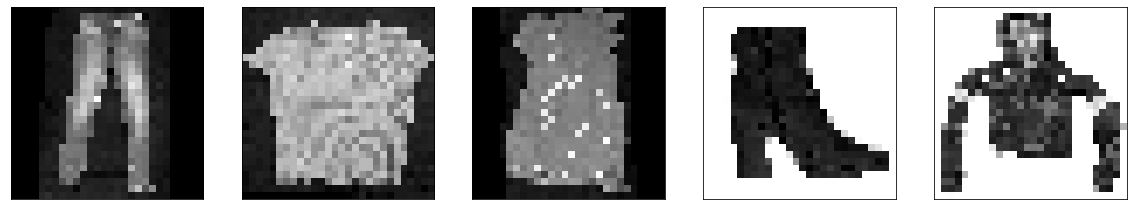

In [288]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5, figsize=(20, 20)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i],cmap="gray")  
    axi.set(xticks=[], yticks=[])

<p>The best model from the previous steps is <b>Logistic Regression<b/>

<p>To predict the label of each of the images using the best model i.e the logistic regression model</p>

In [289]:
# Reshape the images for the prediction model
images = images.reshape(5,784)

<p> Checking the accuracy of the model before standardization </p>

In [290]:
y_image_hat = model_lr.predict(images)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print("The class names for the above images are:")
for i in y_image_hat:
    print(class_names[i])
y_image_hat

The class names for the above images are:
Shirt
Shirt
Shirt
Ankle boot
Bag


array([6, 6, 6, 9, 8], dtype=uint8)

In [291]:
y_image = [1, 6, 3, 9, 2]
accuracy = accuracy_score(y_image,y_image_hat, normalize = True) * 100
print("The accurarcy of the model for the images is :",accuracy)

The accurarcy of the model for the images is : 40.0


<p>Checking accuracy of the model after standerdization</p>

In [292]:
images = scaler.fit_transform(images.astype(np.float64))

In [293]:
y_image_hat = model_lr.predict(images)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print("The class names for the above images are:")
for i in y_image_hat:
    print(class_names[i])
y_image_hat

The class names for the above images are:
Dress
Shirt
Dress
Ankle boot
Bag


array([3, 6, 3, 9, 8], dtype=uint8)

In [294]:
y_image = [1, 6, 3, 9, 2]
accuracy = accuracy_score(y_image,y_image_hat, normalize = True) * 100
print("The accurarcy of the model for the images is :",accuracy)

The accurarcy of the model for the images is : 60.0


<p> We can see that the model's accuracy is better after the standardization of the model and after. Since I have used black background for most of the images and the model is trained against the white background, conclusions can be draw saying that the accuracy is low for those images with black background as opposed to the ones with the white background.</p>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>